In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [5]:
dog = cv2.imread('data/CATS_DOGS/train/DOG/0.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

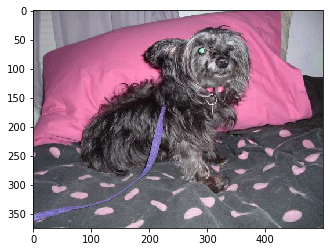

In [7]:
plt.imshow(dog)

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

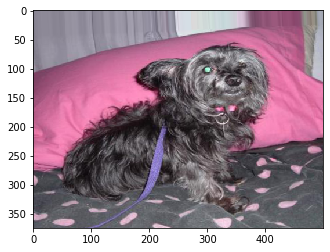

In [10]:
plt.imshow(image_gen.random_transform(dog))

In [13]:
input_shape = (150, 150, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Dense, Activation, Flatten

In [14]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [15]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory('data/CATS_DOGS/train',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [16]:
test_image_gen = image_gen.flow_from_directory('data/CATS_DOGS/test',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [17]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [29]:
model.fit_generator(train_image_gen,
                   epochs=1,
                   #steps_per_epoch=150,
                   validation_data=test_image_gen,
                   validation_steps=12)

Epoch 1/1
1172/1172 [==============================] - 362s 309ms/step - loss: 0.6626 - acc: 0.6017 - val_loss: 0.6177 - val_acc: 0.6497


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from keras.preprocessing import image

In [23]:
cat_image = image.load_img('data/CATS_DOGS/test/CAT/10004.jpg', target_size=(150,150))

In [24]:
import numpy as np

In [25]:
cat_image = image.img_to_array(cat_image)
cat_image.shape

(150, 150, 3)

In [26]:
cat_image /= 255
cat_image = np.reshape(cat_image, (1,150,150,3))

In [27]:
model.predict_classes(cat_image)

array([[0]], dtype=int32)

In [28]:
model.predict(cat_image)

array([[0.4976954]], dtype=float32)